In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Импорт сведений о стационарных станциях наблюдения
Источник данных: Портал открытых данных правительства Москвы https://data.mos.ru/opendata/2447
Полный перечень полей: ["ID","StationName","global_id","StationPurpose","SurveillanceZoneCharacteristics","AdmArea","District","Location","Longitude","Latitude","StartUpYear","IsWorking","geoData"]

In [144]:
# Перед запуском заменить директорию на актуальную
df = pd.read_csv('/home/antonio/study_python/15_team_hak_19_10/data_stations.csv', sep=';', 
                   usecols=["StationName","global_id","StationPurpose","SurveillanceZoneCharacteristics","AdmArea","District","Location","Longitude","Latitude","StartUpYear","IsWorking"])
df.head(5)

,StationName,global_id,StationPurpose,SurveillanceZoneCharacteristics,AdmArea,District,Location,Longitude,Latitude,StartUpYear,IsWorking
0,Сухаревская площадь,171656891,контроль качества атмосферного воздуха,Вблизи автомагистралей,Центральный административный округ,Мещанский район,"город Москва, Малая Сухаревская площадь, дом 1...",37.627445,55.773757,1996,да
1,Шаболовка,171656892,контроль качества атмосферного воздуха,Жилые территории,Южный административный округ,Донской район,"Дальний переулок, дом 2, корпус 1",37.605238,55.715698,1996,да
2,Казакова,171656893,контроль качества атмосферного воздуха,Жилые территории,Центральный административный округ,Басманный район,"город Москва, Гороховский переулок, дом 4, кор...",37.662100,55.763850,2000,да
3,Марьино,171656894,контроль качества атмосферного воздуха,Смешанные антропогенные источники загрязнений,Юго-Восточный административный округ,район Марьино,"Новомарьинская улица, дом 7",37.751502,55.652695,1999,да
4,Зеленоград 6,171656895,контроль качества атмосферного воздуха,Жилые территории,Зеленоградский административный округ,район Савёлки,"город Зеленоград, корпус 623",37.227940,55.989710,2004,да


### Визуализация статистики ввода в эксплуатацию станций по годам

In [109]:
ax = df.plot.bar(y='StartUpYear', figsize=(12, 4))

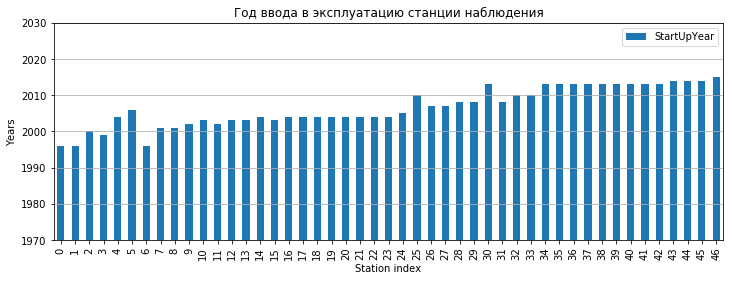

In [110]:
plt.title('Год ввода в эксплуатацию станции наблюдения')
plt.xlabel('Station index')
plt.ylabel('Years')
plt.grid(axis='y')
plt.ylim(bottom=1970, top=2030)
plt.show()

### Группировка по годам ввода в эксплуатацию
Закомментированные ячейки - проверочны вывод

In [111]:
grouped_year = df.groupby('StartUpYear')

In [112]:
#grouped.get_group(1996)
#print(df.groupby('StartUpYear').groups)

In [113]:
count_by_year = grouped_year.agg(np.size)
count_by_year = count_by_year.drop(["StationName","StationPurpose","SurveillanceZoneCharacteristics","AdmArea","District","Location","Longitude","Latitude","IsWorking"], axis=1)

In [124]:
#count_by_year.head()

#### Насыщение данными по годам, когда ввод в эксплуатацию не происходил

In [115]:
df2 = pd.DataFrame(data=[[0],[0],[0],[0],[0],[0],[0],[0]], index=[1997,1998,2009,2011,2012,2016,2017,2018], columns=['global_id'], dtype = int)

In [116]:
df_extended = count_by_year.append(df2)
#df_extended

In [117]:
df_res = df_extended.sort_index()

#### Визуалицация

In [141]:
ax = df_res.plot.line(y='global_id', figsize=(10, 4))

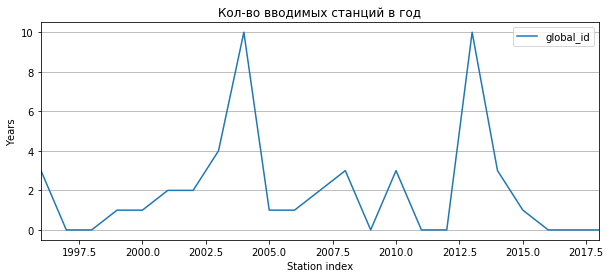

In [142]:
plt.title('Кол-во вводимых станций в год')
plt.xlabel('Station index')
plt.ylabel('Years')
plt.grid(axis='y')
#plt.ylim(bottom=1950, top=2030)
plt.show()

### Группировка по округам
Закомментированные ячейки - проверочны вывод


In [120]:
grouped_area = df.groupby('AdmArea')

In [121]:
count_by_area = grouped_area.agg(np.size)
count_by_area = count_by_area.drop(["StationName","StationPurpose","SurveillanceZoneCharacteristics","District","Location","Longitude","Latitude","StartUpYear","IsWorking"], axis=1)

In [122]:
count_by_area = count_by_area.rename(index = lambda x: x.replace('административный округ','АО')) 
#count_by_area.index


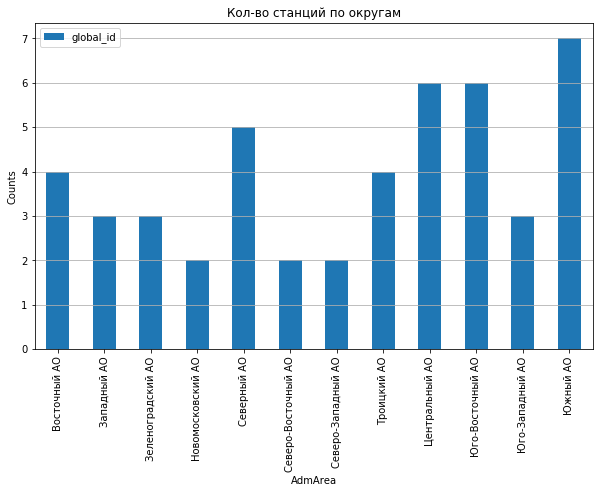

In [123]:
ax = count_by_area.plot.bar(y='global_id', figsize=(10, 6))
plt.title('Кол-во станций по округам')
plt.xlabel('AdmArea')
plt.ylabel('Counts')
plt.grid(axis='y')
plt.legend(loc='upper left')
#plt.ylim(bottom=1950, top=2030)
plt.show()